# Analysis of Gaussian Mixture Models 

This notebook shows examples and usage of the biokit.stats.module. 

The **mixture** module provides tools to create mixture models (gaussian), denoted GMM hereafter. Conversely class are provided to estimate the parameters of the GMM using either minimization or Expectation Minimization. 

We also provide examples to show how to automatically estimate the number of GMMs and limitations of such methods. 

In [10]:
%pylab inline
matplotlib.rcParams['figure.figsize'] = (12,6)
matplotlib.rcParams['figure.dpi'] = 120
from biokit.stats import mixture
import seaborn

Populating the interactive namespace from numpy and matplotlib


### gaussian mixture model

In [11]:
m = mixture.GaussianMixture(mu=[-2, 1], sigma=[0.5,0.5], 
                    mixture=[.2,.8], N=50)

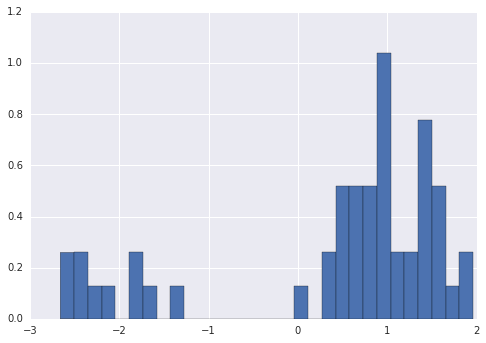

In [12]:
# data is stored in m.data and an histogram can easily be shown:
m.hist()

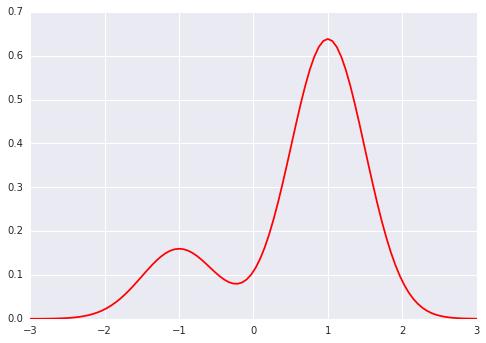

In [13]:
# In order to figure out the underlying parameters of the distribution
# given the above sample, we will first use the GaussianMixtureFitting 
# class, which minimizes the  distribution of the data to a mixture 
# of gaussian model, which is provided inside the GaussianMixtureModel 
# class:
gmm = mixture.GaussianMixtureModel(k=2)

X = linspace(-3,3,100)
plot(X, gmm.pdf(X, params=[-1,0.5,0.2,1,0.5,0.8]), 'r')



### Gaussian Mixture model Fitting (minimization)

In [14]:
# now, let us use the following class to figure out the parameters of the
# gaussian models. We have to provide the number of models. Here k=2
mf = mixture.GaussianMixtureFitting(m.data, k=2)

In [15]:
#
mf.estimate()

            AIC: 117.11633700182807
           AICc: 117.37165615076424
            BIC: 6.148291878037601
  final_simplex: (array([[-2.11868625,  0.42502233,  0.13936887,  1.03782767,  0.46240836,
         0.55747938],
       [-2.11863348,  0.42503395,  0.13937207,  1.03783406,  0.46240684,
         0.55747192],
       [-2.1187063 ,  0.42502272,  0.139362  ,  1.03788596,  0.46240692,
         0.55745363],
       [-2.11873346,  0.42502687,  0.13936959,  1.03784243,  0.46239368,
         0.55747896],
       [-2.11866946,  0.42506566,  0.13937575,  1.03787086,  0.46241925,
         0.55747785],
       [-2.11873568,  0.42503442,  0.13938434,  1.03786534,  0.46240787,
         0.55747131],
       [-2.11868294,  0.42500501,  0.13938508,  1.03784078,  0.46238817,
         0.5574791 ]]), array([ 56.5581685 ,  56.55816855,  56.55816855,  56.55816856,
        56.55816856,  56.55816858,  56.55816863]))
            fun: 56.558168500914036
 log_likelihood: 56.558168500914036
        message: 'Opti

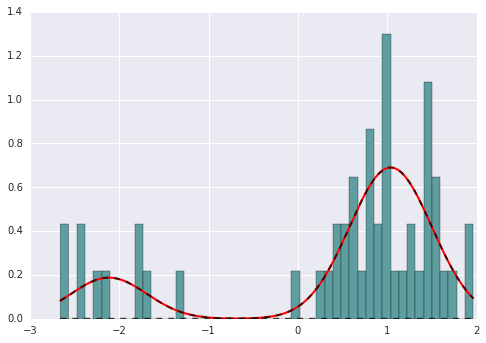

In [16]:
mf.plot()

### Expectation Minimization

Another method to estimate the parameters is to use an Expectation
Minimization algorithm

In [17]:
em = mixture.EM(m.data, model=gmm)

In [18]:
em.estimate()

/home/cokelaer/Work/github/biokit/biokit/stats/mixture.py:408: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  gamma = np.zeros((N_, self.size))


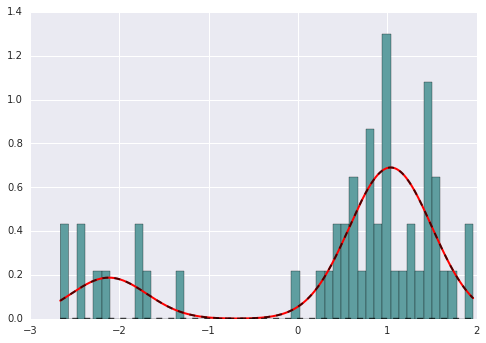

In [19]:
em.plot()

In [20]:
em.results.mus

[-2.1186862326372573, 1.0378531852276816]

In [21]:
# to compare to numerical values found with the GaussianMixtureFitting 
mf.results.mus

[-2.1186862536009188, 1.0378276673396025]

### How EM and minimization compare in terms of parameter estimation

Is the EM better than MixtureFitting class (scipy minimisation) ?

We can check that by generating N simulated data sets for some parameters

In [22]:
res_mf = []; res_em = []
N = 50
from easydev import Progress
replicates = 100
p = Progress(replicates)

mus = [-2,1]
sigmas = [0.5,0.5]
pis= [.2,0.8]
for i in range(0, replicates):
    m = mixture.GaussianMixture(mu=mus, sigma=sigmas, mixture=pis, N=N)
    mf = mixture.GaussianMixtureFitting(m.data)
    mf.estimate(guess=[-.8,0.5,0.5,.8,0.5,0.5])
    res_mf.append(mf.results)
    
    em = mixture.EM(m.data, model=gmm)
    em.estimate(guess=[-.8, 0.5, 0.5, .8, 0.5, 0.5])
    res_em.append(em.results)
    p.animate(i+1)
    
    

 [-                 4%                  ] 4 of 100 complete in 0.2 sec

/home/cokelaer/Work/github/biokit/biokit/stats/mixture.py:408: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  gamma = np.zeros((N_, self.size))


 [-----------------100%-----------------] 100 of 100 complete in 6.3 sec

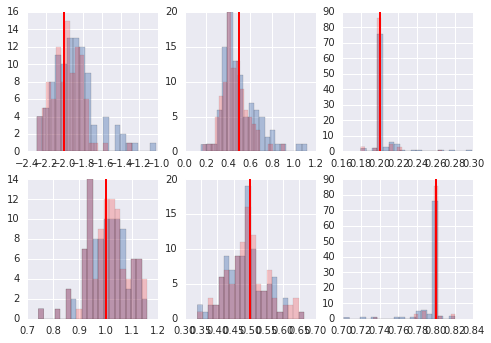

In [23]:
subplot(2,3,1)
hist([x.mus[0] for x in res_mf], 20, alpha=0.4);
hist([x.mus[0] for x in res_em], 20, color='r', alpha=0.2)
axvline(mus[0], color='r', lw=2)

subplot(2,3,2)
hist([x.sigmas[0] for x in res_mf], 20, alpha=0.4);
hist([x.sigmas[0] for x in res_em], 20, color='r', alpha=0.2)
axvline(sigmas[0], color='r', lw=2)

subplot(2,3,3)
hist([x.pis[0] for x in res_mf], 20, alpha=0.4);
hist([x.pis[0] for x in res_em], 20, color='r', alpha=0.2)
axvline(pis[0], color='r', lw=2)

subplot(2,3,4)
hist([x.mus[1] for x in res_mf], 20, alpha=0.4);
hist([x.mus[1] for x in res_em], 20, color='r', alpha=0.2)
axvline(mus[1], color='r', lw=2)

subplot(2,3,5)
hist([x.sigmas[1] for x in res_mf], 20, alpha=0.4);
hist([x.sigmas[1] for x in res_em], 20, color='r', alpha=0.2)
axvline(sigmas[1], color='r', lw=2)

subplot(2,3,6)
hist([x.pis[1] for x in res_mf], 20, alpha=0.4);
hist([x.pis[1] for x in res_em], 20, color='r', alpha=0.2)
axvline(pis[1], color='r', lw=2)


Performace are quite similar

### Adaptive Estimation of required number of models

In [25]:
m = mixture.GaussianMixture(mu=[-1, 1], sigma=[0.5,0.5], 
                    mixture=[.2,.8], N=50)

In [26]:
# if we know that k=2, it is easy to estimate the parameters
res = mf.estimate(k=2)

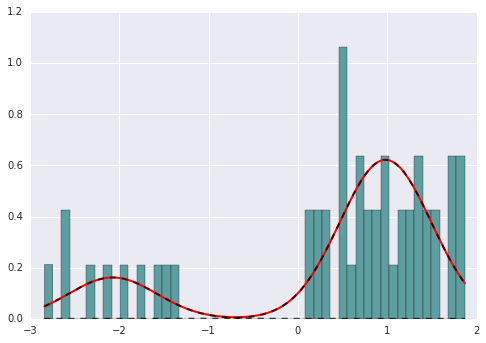

In [27]:
mf.plot()

### What about automatic inference of k ?

Found min  101.529055102 for k   7


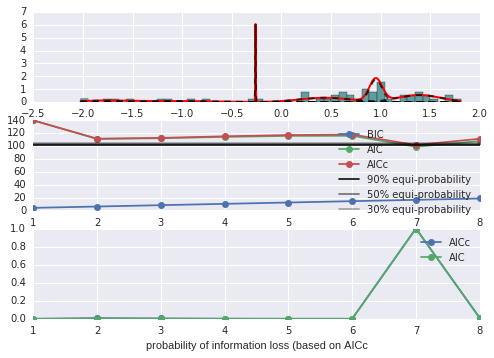

In [28]:
amf = mixture.AdaptativeMixtureFitting(m.data)
amf.diagnostic(kmin=1, kmax=8)

The proposed/optimal k in terms of Aikike is k=4, which is 
not correct.

What about using EM ?

In [29]:
amf.fitting = mixture.EM(m.data)

In [30]:
amf.run(kmin=1, kmax=6)

Found min  93.5399652364 for k   6


/home/cokelaer/Work/github/biokit/biokit/stats/mixture.py:408: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  gamma = np.zeros((N_, self.size))


/home/cokelaer/Work/github/biokit/biokit/stats/mixture.py:408: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  gamma = np.zeros((N_, self.size))


Found min  85.3814366417 for k   8


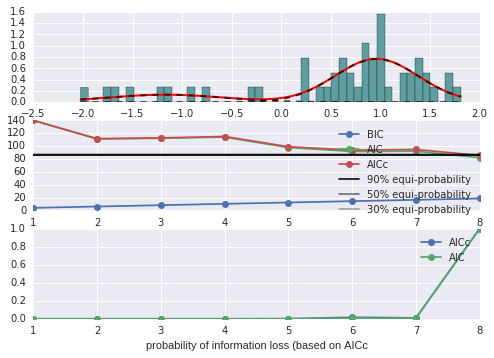

In [31]:
amf.diagnostic(k=2)

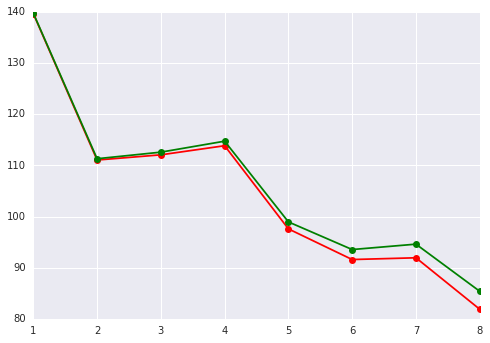

In [32]:
plot(amf.x[0:8], [amf.all_results[i]['AIC'] for i in amf.x[0:8]], 'or-')
plot(amf.x[0:8], [amf.all_results[i]['AICc'] for i in amf.x[0:8]], 'og-')

Now the question is how reliable is this estimation of k on 100 experiments ?

In [33]:

bestk_em = []
aics_em = []

bestk_m = []
aics_m = []

replicates = 100
p = Progress(replicates)

for i in range(0, replicates):
    m = mixture.GaussianMixture(mu=[-1, 1], sigma=[0.5,0.5], 
                    mixture=[.2,.8], N=1000)
    amf = mixture.AdaptativeMixtureFitting(m.data)
    amf.verbose = False
    amf.fitting = mixture.EM(m.data)
    amf.run()
    bestk_em.append(amf.best_k)
    aics_em.append(amf.fitting.results.AIC)
    
    amf = mixture.AdaptativeMixtureFitting(m.data)
    amf.verbose = False
    amf.run()
    bestk_m.append(amf.best_k)
    aics_m.append(amf.fitting.results.AIC)
    
    p.animate(i+1)

/home/cokelaer/Work/github/biokit/biokit/stats/mixture.py:408: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  gamma = np.zeros((N_, self.size))


 [-----------------100%-----------------] 100 of 100 complete in 208.2 sec

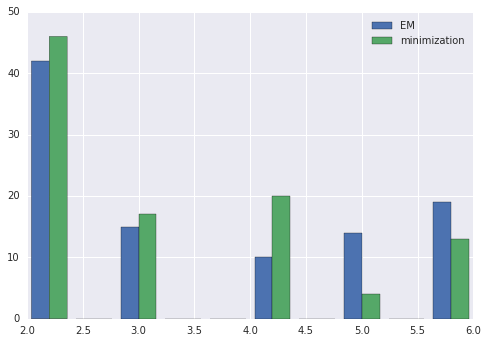

In [36]:
res = hist([bestk_em, bestk_m])
legend(['EM', 'minimization'])

([array([  6.,   7.,  14.,   9.,  19.,  13.,  13.,  10.,   5.,   4.]),
  array([  6.,   7.,  13.,  10.,  20.,  10.,  13.,  11.,   6.,   4.])],
 array([ 2290.17364938,  2305.66307665,  2321.15250391,  2336.64193117,
         2352.13135844,  2367.6207857 ,  2383.11021296,  2398.59964023,
         2414.08906749,  2429.57849475,  2445.06792201]),
 <a list of 2 Lists of Patches objects>)

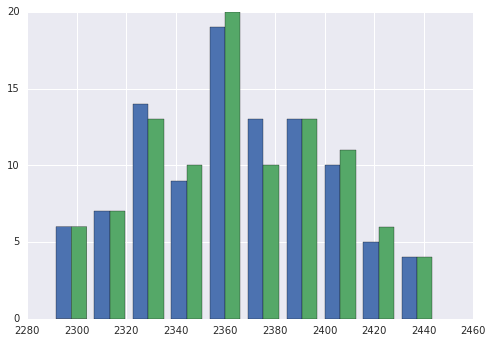

In [37]:
hist([aics_em, aics_m])


### Conclusions

When N = 50, the adaptative EM or Minimization methods do not allow the 
recovery of k automaticaly. you need ~ 1000 points

There is no obvious differences between the two algorithms.